# Einfache berechnung der Fourier-Reihe

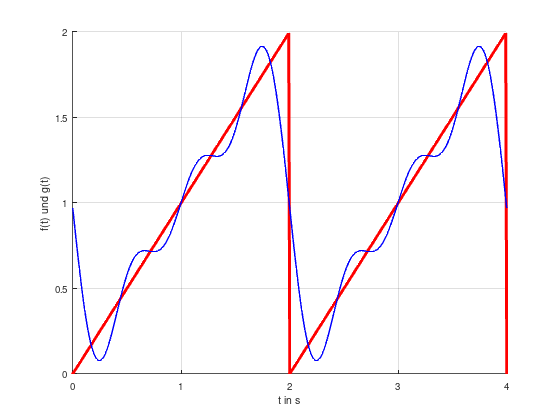

In [5]:
close all
clear all
clc

T=2;
w1=2*pi/T;
m=1;

p=2;
t_max=T*p;
dt=0.01;
t=0:dt:t_max;
f=m*t-floor(t/T)*T*m;
a0=0;
for i=1:(T/dt)
  f_v=f(i)+f(i+1);
  a0=a0+(dt*(f_v)/2);
end
a0=2*a0/T;
n=3;
a=zeros(n,1);
b=zeros(n,1);
for k=1:n
    for i=1:(T/dt)
        a(k)=a(k)+dt*(f(i)*cos(k*w1*t(i))+f(i+1)*cos(k*w1*t(i+1)))/2;
        b(k)=b(k)+dt*(f(i)*sin(k*w1*t(i))+f(i+1)*sin(k*w1*t(i+1)))/2;
    end
end
a=2*a/T;
b=2*b/T;

g=f*0+(a0/2);
for k=1:n
    g=g+a(k)*cos(k*w1*t)+b(k)*sin(k*w1*t);
end
figure(1)
grid on
hold on
plot(t, f, '-r', 'LineWidth', 3.0)
plot(t, g, '-b', 'LineWidth', 1.5)
xlabel('t in s', 'FontSize', 11)
ylabel('f(t) und g(t)', 'FontSize', 11)

# DFT vs FFT

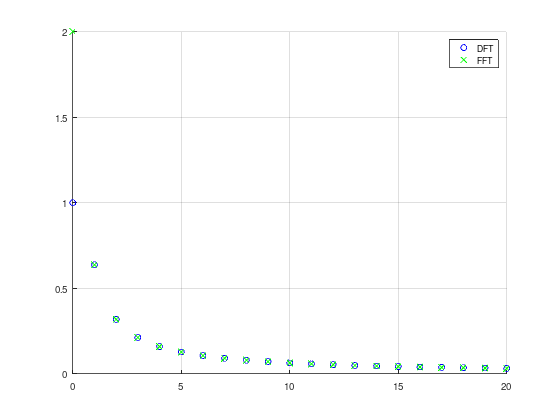

In [7]:
close all
clear all
clc

T=2;
dt=0.001;
t=0:dt:T;
m=1;
f=t*m;
N=length(f);
n=20;

cRE=zeros(n+1, 1);
cIM=zeros(n+1,1);
for k=-n:1:n
  for i=1:1:N-1
    cRE(abs(k)+1)=cRE(abs(k)+1)+f(i)*cos(2*pi*k*i/N);
    cIM(abs(k)+1)=cIM(abs(k)+1)+f(i)*sin(2*pi*k*i/N);
  end
  cRE(abs(k)+1) = cRE(abs(k)+1)/N;
  cIM(abs(k)+1) = cIM(abs(k)+1)/N;
end
A=2*sqrt(cRE.^2 + cIM.^2);
A(1) = A(1)/2;

figure(1)
grid on
hold on
plot((0:1:n), A, 'ob')
c=fft(f);
A=2*abs(c/N);
a(1)=A(1)/2;
plot((0:1:n), A(1:n+1), 'xg')
legend('DFT', 'FFT')


